# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Will free-tier customers convert to paying customers (yes/no)

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, customer usage data

#### 3. What timeframe is this data relevent for?

Answer: Between January and April of 2015

#### 4. What is the hypothesis?

Answer: Probability of conversion from free-tier to paying can be estimated by a free-tiers customer's age, gender, location, profession, and customer 

## Let's get started with the ADMISSIONS dataset

In [1]:
#import libraries and matplotlib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#import the admissions csv from an absolute reference
df=pd.read_csv('C:\\Users\\Dale\\Desktop\\data science\\DS-SF-39\\projects\\unit-projects\\project-1\\assets\\admissions.csv')

In [6]:
#provide a sample of the csv data
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### 1. Create a data dictionary 

In [4]:
print "Answer:"
data=({'Variable':['Admit','GRE','GPA','Prestige']
       ,'Description':['0=not admitted 1=admitted','gre score earned','undergraduate gpa','undergrad prestige (1=tier1 to 4=tier4)']
       ,'Variable Type':['categorical','continuous','continuous','categorical']})
dictionary=pd.DataFrame(data)

dictionary[['Variable','Description','Variable Type']]
dictionary.set_index('Variable')

Answer:


,Description,Variable Type
Variable,,
Admit,0=not admitted 1=admitted,categorical
GRE,gre score earned,continuous
GPA,undergraduate gpa,continuous
Prestige,undergrad prestige (1=tier1 to 4=tier4),categorical


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Will a student be admitted to graduate school (yes/no)

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer: No timeframe is specified in the dataset

#### 4. What is the hypothesis?

Answer: Using GRE score, undergraduate GPA, and undergraduate program prestige the proability of a student's acceptance into a graduate program can be estimated. 

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goals of the exploratory analysis are to determine what relationships, if any, exists between the variables and the probability of an undergraduate applicant being accepted into a graduate program.

#### 2a. What are the assumptions of the distribution of data? 

Answer: The data for those undergraduate applicants that are accepted into a graduate progam generally have higher GPAs, GRE scores and attend a more prestigious school than those who are not accepted into a graduate program

In [37]:
df[(df['admit']==1)].describe()

,admit,gre,gpa,prestige
count,127.0,127.000000,126.000000,126.000000
mean,1.0,618.897638,3.489206,2.150794
std,0.0,108.884884,0.371655,0.921455
min,1.0,300.000000,2.420000,1.000000
25%,1.0,540.000000,3.220000,1.000000
50%,1.0,620.000000,3.545000,2.000000
75%,1.0,680.000000,3.757500,3.000000
max,1.0,800.000000,4.000000,4.000000


In [65]:
df[(df['admit']==0)].describe()

,admit,gre,gpa,prestige
count,273.0,271.000000,272.000000,273.000000
mean,0.0,573.579336,3.345404,2.641026
std,0.0,116.052798,0.376773,0.917198
min,0.0,220.000000,2.260000,1.000000
25%,0.0,500.000000,3.080000,2.000000
50%,0.0,580.000000,3.340000,3.000000
75%,0.0,660.000000,3.610000,3.000000
max,0.0,800.000000,4.000000,4.000000


### Distribution Description of Acceptance

gpa        -0.539566
gre        -0.179065
prestige    0.442143
dtype: float64
gpa           3.545
gre         620.000
prestige      2.000
dtype: float64
gpa           3.489206
gre         618.897638
prestige      2.150794
dtype: float64


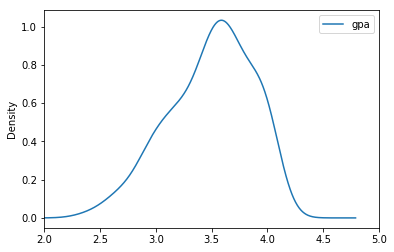

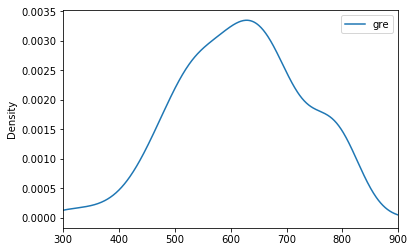

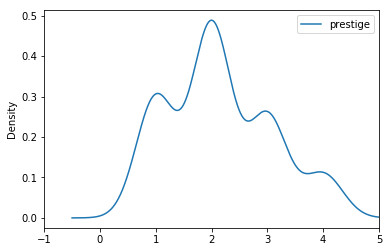

In [62]:
df[['gpa']][(df['admit']==1)].plot(kind="density", xlim=(2,5))
df[['gre']][(df['admit']==1)].plot(kind="density", xlim=(300,900))
df[['prestige']][(df['admit']==1)].plot(kind="density", xlim=(-1,5))

print df[['gpa','gre','prestige']][(df['admit']==1)].skew()
print df[['gpa','gre','prestige']][(df['admit']==1)].median()
print df[['gpa','gre','prestige']][(df['admit']==1)].mean()

### Distribution Description of Non-Acceptance

gpa        -0.078935
gre        -0.110888
prestige   -0.033357
dtype: float64
gpa           3.34
gre         580.00
prestige      3.00
dtype: float64
gpa           3.345404
gre         573.579336
prestige      2.641026
dtype: float64


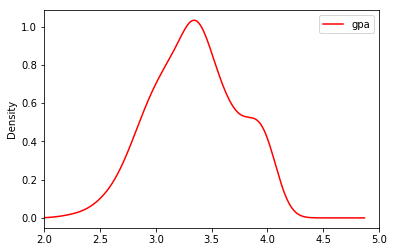

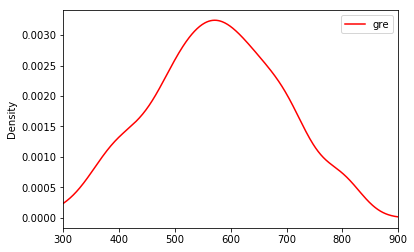

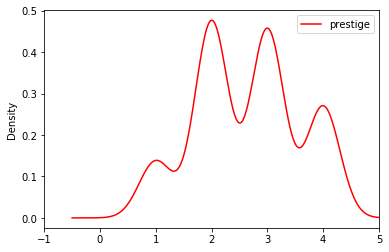

In [68]:
df[['gpa']][(df['admit']==0)].plot(kind="density",color='r',xlim=(2,5))
df[['gre']][(df['admit']==0)].plot(kind="density",color='r', xlim=(300,900))
df[['prestige']][(df['admit']==0)].plot(kind="density",color='r', xlim=(-1,5))

print df[['gpa','gre','prestige']][(df['admit']==0)].skew()
print df[['gpa','gre','prestige']][(df['admit']==0)].median()
print df[['gpa','gre','prestige']][(df['admit']==0)].mean()

#### 2b. How will you determine the distribution of your data? 

Answer: There are a number of ways to determine data distribution. Mean, median, and mode are the easiest. One can also look at density charts and histograms as well.

#### 3a. How might outliers impact your analysis? 

Answer: Depending on the measurement used and outlier can skew the results of central tendencies. For example, a high GRE score for a couple of candidates can skew the entire dataset negatively and give the impression that those being accepted into a program are on average getting higher scores than they actually did.

#### 3b. How will you test for outliers? 

Answer: There are a couple of ways to test four outliers one way is to show all of those instances that are greater than two standard deviations. Another way to to create box plots where outliers will be determined for the user graphically.

In [81]:
print "Answer:"
x=df['gre'][(df['admit']==1)]
y=df['gre'][(df['admit']==0)]

Answer:


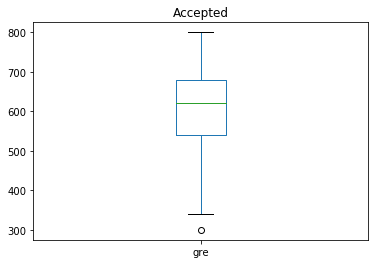

In [86]:
x.plot(kind='box',title="Accepted")

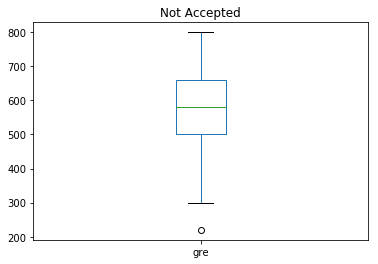

In [87]:
y.plot(kind='box',title="Not Accepted")

In [90]:
print "Answer:"
w=df['gpa'][(df['admit']==1)]
z=df['gpa'][(df['admit']==0)]

Answer:


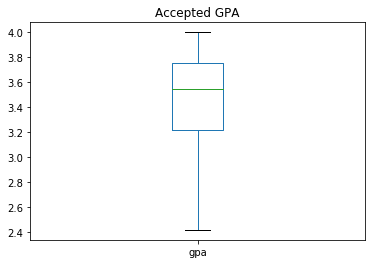

In [91]:
w.plot(kind='box',title='Accepted GPA')

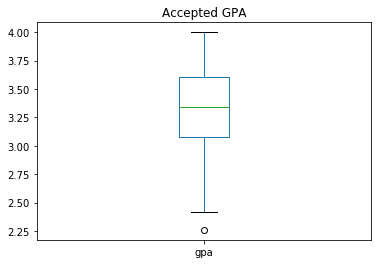

In [92]:
z.plot(kind='box',title='Accepted GPA')

#### 4a. What is colinearity? 

Answer: The linear association between two variables

#### 4b. How will you test for colinearity? 

Answer: The Correlation Coefficient or Covariance

In [96]:
df.corr(method='pearson')

,admit,gre,gpa,prestige
admit,0.217237,9.871271,0.031191,-0.106189
gre,9.871271,13369.953040,16.824761,-13.648068
gpa,0.031191,16.824761,0.144879,-0.021260
prestige,-0.106189,-13.648068,-0.021260,0.893654


In [97]:
df.cov()

,admit,gre,gpa,prestige
admit,0.217237,9.871271,0.031191,-0.106189
gre,9.871271,13369.953040,16.824761,-13.648068
gpa,0.031191,16.824761,0.144879,-0.021260
prestige,-0.106189,-13.648068,-0.021260,0.893654


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
1. import the data
2. pull a sample using head or tail
3. describe the dataset for acceptance and non acceptance
4. evaluate the distribution using density plots, histograms, or descriptive statistic functions 
5. Test for outliers using the box plots
6. Identify colinearity using the corr function

## Bonus Questions:
1. Outline your analysis method for predicting your outcome: I would add together the probabilites of admission between the GRE,    GPA, and prestige variables and from there create a range from which the overall probability could be calculated by adding in    any of the variables - in short create a multivariable regression.

2. Write an alternative problem statement for your dataset
   Although most assume that school prestige is a factor for admission I'd argue that GRE and GPA are weighted more heavily than    prestige and that this variable doesn't have to be included to provide a reasonable outcome for graduate admissions.  

3. Articulate the assumptions and risks of the alternative model
   The risk is that school prestige might be correlated with GPA and GRE scores and therefore I may not actually be ruling it      out since it may be a major determinat of the other variables 